Alright, let's move on to two fundamental concepts that explain *how* our linear regression model (and many other machine learning models) actually "learns" the best parameters: the **Cost Function (specifically MSE)** and the optimization algorithm **Gradient Descent**.

**Part 4: Cost Function (Mean Squared Error - MSE)**

1.  **What is a Cost Function?**
    * In supervised learning, our goal is to create a model that makes predictions ($\hat{y}$) that are as close as possible to the actual target values ($y$).
    * A **cost function** (also called a loss function or objective function) quantifies how "bad" or "wrong" our model's predictions are for a given set of model parameters (like $b_0$ and $b_1$ in simple linear regression).
    * The core idea of training a model is to find the specific values for its parameters that **minimize** this cost function. The lower the cost, the better our model fits the training data.

2.  **Mean Squared Error (MSE) for Linear Regression**
    * For a single data point $i$, the error (or residual) is the difference between the actual value $y_i$ and the predicted value $\hat{y}_i$:
        $$\text{error}_i = y_i - \hat{y}_i$$
    * We want to combine these errors from all $n$ data points in our training set into a single cost value.
    * **Why square the error?**
        1.  **Direction doesn't matter for cost:** An error of -2 is just as bad as an error of +2. Squaring makes all errors positive: $(-2)^2 = 4$ and $(2)^2 = 4$.
        2.  **Penalizes larger errors more:** An error of 4 (squared is 16) is penalized more than twice an error of 2 (squared is 4). This often makes sense as large errors are usually more problematic.
        3.  **Mathematical properties:** The squared error function is smooth and convex (for linear regression), meaning it has a single global minimum and its derivative is easy to calculate, which is essential for optimization algorithms like Gradient Descent.
    * **Sum of Squared Errors (SSE) or Residual Sum of Squares (RSS):** This is the sum of all the squared errors:
        $$\text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
    * **Mean Squared Error (MSE):** This is simply the average of the squared errors. It's often preferred over SSE because it's independent of the number of data points, making it easier to compare across datasets of different sizes.
        $$\text{MSE} = J(b_0, b_1, ..., b_p) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
        The notation $J(b_0, b_1, ..., b_p)$ indicates that the MSE is a function of our model's parameters (the coefficients $b_j$). For Simple Linear Regression ($ \hat{y}_i = b_0 + b_1 x_i $):
        $$\text{MSE} = J(b_0, b_1) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (b_0 + b_1 x_i))^2$$
        For Multiple Linear Regression ($ \hat{y}_i = b_0 + b_1 x_{i1} + ... + b_p x_{ip} $):
        $$\text{MSE} = J(b_0, ..., b_p) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (b_0 + b_1 x_{i1} + ... + b_p x_{ip}))^2$$
    * **Visualizing the Cost Function (Conceptual):**
        * For Simple Linear Regression (with parameters $b_0$ and $b_1$), if you plot MSE against possible values of $b_0$ and $b_1$, you'd get a 3D bowl shape. Our goal is to find the coordinates ($b_0, b_1$) at the very bottom of this bowl.
        * For Multiple Linear Regression, this "bowl" exists in higher dimensions, but the principle is the same: it's a convex shape, meaning there's one global minimum we're trying to find.

    *(Self-correction: The factor for MSE is often $1/n$ or $1/(2n)$ for mathematical convenience in derivatives, especially when using gradient descent. Scikit-learn's `mean_squared_error` uses $1/n$. The $1/2$ factor sometimes simplifies the gradient calculation by canceling out the '2' from differentiating the squared term. The fundamental shape and location of the minimum remain the same.)*

3.  **Why is MSE the Standard for (Basic) Linear Regression?**
    * When the assumptions of linear regression hold (particularly normally distributed and homoscedastic errors), minimizing the MSE is equivalent to finding the **Maximum Likelihood Estimate (MLE)** for the coefficients. This gives the MSE a strong statistical grounding.
    * As mentioned, its mathematical properties (convexity and differentiability) make it well-suited for optimization.

Now that we know what we're trying to minimize (the MSE), let's look at *how* we can find the parameters that achieve this minimum. This brings us to Gradient Descent.

---

**Part 5: Gradient Descent**

1.  **The Optimization Problem:**
    Our goal is to find the values of $b_0, b_1, ..., b_p$ that minimize the cost function $J(b_0, b_1, ..., b_p)$.
    * One way to solve this for linear regression is using the **Normal Equation**: $b = (X^T X)^{-1} X^T y$. This is an analytical solution that directly calculates the optimal coefficients in one step. Scikit-learn's `LinearRegression` often uses this (or a similar method based on matrix decomposition like SVD).
    * However, the Normal Equation can be computationally expensive if you have a very large number of features (calculating $(X^T X)^{-1}$ is roughly $O(p^3)$ where $p$ is the number of features). Also, for many other machine learning models, an analytical solution like the Normal Equation doesn't exist.
    * This is where **Gradient Descent**, an iterative optimization algorithm, comes in.

2.  **Intuition behind Gradient Descent:**
    * Imagine you're standing on a foggy mountain (the cost function surface) and you want to get to the lowest point (the minimum cost).
    * You can't see the whole landscape, but you can feel the slope of the ground under your feet.
    * To go down, you'd take a step in the steepest downhill direction.
    * You repeat this process, taking small steps, and eventually, you should reach the valley floor.
    * The "slope" in mathematical terms is the **gradient** of the cost function. The gradient is a vector of partial derivatives of $J$ with respect to each parameter ($ \frac{\partial J}{\partial b_0}, \frac{\partial J}{\partial b_1}, ..., \frac{\partial J}{\partial b_p} $).
    * The gradient points in the direction of the **steepest ascent** (uphill). So, to go downhill, we move in the **opposite direction** of the gradient.

3.  **Gradient Descent Algorithm Steps:**
    1.  **Initialize Parameters:** Start with some initial guesses for the coefficients $b_0, b_1, ..., b_p$ (e.g., all zeros or small random numbers).
    2.  **Define a Learning Rate $\alpha$**: This determines the size of the steps we take (more on this later).
    3.  **Repeat** for a specified number of iterations or until the cost function stops decreasing significantly (convergence):
        a.  **Calculate the Gradient:** Compute the partial derivative of the cost function $J$ with respect to each parameter $b_j$. For MSE and linear regression, the gradient components are:
            For a single training example $(x_i, y_i)$ and prediction $\hat{y}_i$:
            $$\frac{\partial J}{\partial b_0} = \frac{1}{n} \sum_{i=1}^{n} -2(y_i - \hat{y}_i) = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)$$
            $$\frac{\partial J}{\partial b_j} = \frac{1}{n} \sum_{i=1}^{n} -2(y_i - \hat{y}_i)x_{ij} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)x_{ij} \quad (\text{for feature } j > 0)$$
            (*Note: If MSE is defined as $\frac{1}{2n}\sum(...)^2$, the '2's cancel out. We'll stick to the $1/n$ definition and keep the '2' for now, or adjust the learning rate accordingly.*)
            In vector form for all parameters $b$:
            $$\nabla J(b) = \frac{2}{n} X^T (Xb - y)$$
            where $X$ is the feature matrix (with an intercept column), $b$ is the vector of coefficients, and $y$ is the vector of actual target values. $Xb - y$ is the vector of errors $(\hat{y} - y)$. (Note: $Xb-y$ vs $y-Xb$ just flips the sign of the gradient which is absorbed by the update rule's minus sign). Let's use $y - Xb$ to be consistent with $y_i - \hat{y}_i$. So $\nabla J(b) = -\frac{2}{n} X^T (y - Xb)$.

        b.  **Update Parameters:** Adjust each parameter by moving it in the opposite direction of its corresponding gradient component, scaled by the learning rate $\alpha$:
            $$b_j := b_j - \alpha \frac{\partial J}{\partial b_j}$$
            This means: $ b_{\text{new}} = b_{\text{old}} - \alpha \cdot \text{gradient} $

4.  **The Learning Rate ($\alpha$)**
    * This is a **hyperparameter** that controls how big of a step we take downhill in each iteration.
    * **Its choice is critical:**
        * **Too small $\alpha$**: Gradient descent will be very slow to converge, requiring many iterations. It might also get stuck in a shallow local minimum if the cost function isn't perfectly convex (though for linear regression with MSE, it is).
        * **Too large $\alpha$**: The algorithm might overshoot the minimum. Instead of converging, the cost might oscillate wildly or even diverge (increase indefinitely).
    * Finding a good learning rate often involves some experimentation. A common practice is to try several values (e.g., 0.001, 0.01, 0.1, 1).

5.  **Feature Scaling for Gradient Descent**
    * It's **highly recommended, often essential**, to scale your features before applying gradient descent.
    * **Why?** If features have vastly different scales (e.g., 'age' from 20-70 and 'income' from 20000-100000), the cost function surface becomes very elongated and narrow (like a stretched ellipse instead of a circle). Gradient descent will then take a very inefficient, zig-zag path to the minimum and converge very slowly.
    * **Common scaling methods:**
        * **Standardization (Z-score normalization):** $x' = (x - \mu) / \sigma$. Transforms data to have mean 0 and standard deviation 1. (Scikit-learn's `StandardScaler`)
        * **Normalization (Min-Max scaling):** $x' = (x - \text{min}) / (\text{max} - \text{min})$. Scales data to a fixed range, usually [0, 1]. (Scikit-learn's `MinMaxScaler`)
    * Scaling ensures that the cost function surface is more symmetrical, allowing gradient descent to find the minimum much more quickly and directly.

In [3]:
# Let's implement a basic gradient descent for SLR. We'll use a small synthetic dataset.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # To compare

In [4]:
# 0. Generate synthetic data for SLR
np.random.seed(42)
X_synth = 2 * np.random.rand(100, 1) # Single feature
y_synth = 4 + 3 * X_synth + np.random.randn(100, 1) # y = 4 + 3x + noise
y_synth = y_synth.ravel() # Flatten y to a 1D array for easier handling

# --- Feature Scaling (Important for Gradient Descent!) ---
# Although for one feature it might still work without, it's good practice.
# For this simple 1D case, X_synth is already in a decent range (0-2).
# If X_synth was, e.g., 2000 * np.random.rand(100,1), scaling would be crucial.
# Let's proceed without explicit scaling here to keep it simpler,
# but acknowledge its importance for multi-feature or poorly scaled data.

# Add a column of ones for the intercept term (b0)
# X_b will be [x0, x1] where x0 is always 1
X_b_synth = np.c_[np.ones((100, 1)), X_synth]

In [5]:
# 1. Initialize Parameters
b_manual = np.random.randn(2) # b0, b1 (intercept, slope)
print(f"Initial b0 (intercept): {b_manual[0]:.4f}, Initial b1 (slope): {b_manual[1]:.4f}")

Initial b0 (intercept): 0.0130, Initial b1 (slope): 1.4535


In [6]:
# 2. Hyperparameters
learning_rate = 0.1
n_iterations = 1000
n_samples = len(X_synth)

cost_history = []

In [7]:
# 3. Gradient Descent Loop
for iteration in range(n_iterations):
    predictions = X_b_synth.dot(b_manual) # y_hat = X_b * b
    errors = predictions - y_synth       # y_hat - y (sign depends on gradient formula used)
                                         # If J = (y - y_hat)^2, gradient uses (y_hat - y)
                                         # If J = (y_hat - y)^2, gradient uses (y_hat - y)
                                         # Let's use J = 1/n * sum((y_hat - y)^2)
                                         # dJ/db = 2/n * X_b.T * (X_b * b - y)
    
    gradients = (2/n_samples) * X_b_synth.T.dot(errors) # dJ/db
    b_manual = b_manual - learning_rate * gradients   # Update rule

    mse = np.mean(errors**2)
    cost_history.append(mse)

    if iteration % 100 == 0:
        print(f"Iteration {iteration}: MSE = {mse:.4f}, b0 = {b_manual[0]:.4f}, b1 = {b_manual[1]:.4f}")

print(f"\nAfter {n_iterations} iterations:")
print(f"Learned b0 (intercept): {b_manual[0]:.4f}")
print(f"Learned b1 (slope): {b_manual[1]:.4f}")

Iteration 0: MSE = 31.0093, b0 = 1.1010, b1 = 2.5690
Iteration 100: MSE = 0.8075, b0 = 4.1629, b1 = 2.8162
Iteration 200: MSE = 0.8066, b0 = 4.2134, b1 = 2.7716
Iteration 300: MSE = 0.8066, b0 = 4.2150, b1 = 2.7702
Iteration 400: MSE = 0.8066, b0 = 4.2151, b1 = 2.7701
Iteration 500: MSE = 0.8066, b0 = 4.2151, b1 = 2.7701
Iteration 600: MSE = 0.8066, b0 = 4.2151, b1 = 2.7701
Iteration 700: MSE = 0.8066, b0 = 4.2151, b1 = 2.7701
Iteration 800: MSE = 0.8066, b0 = 4.2151, b1 = 2.7701
Iteration 900: MSE = 0.8066, b0 = 4.2151, b1 = 2.7701

After 1000 iterations:
Learned b0 (intercept): 4.2151
Learned b1 (slope): 2.7701


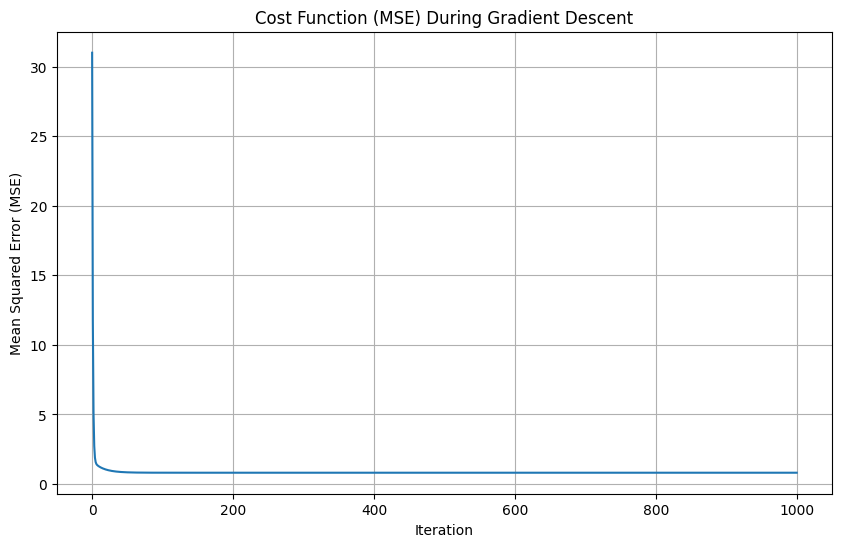

In [8]:
# Plot cost history
plt.figure(figsize=(10,6))
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Cost Function (MSE) During Gradient Descent")
plt.grid(True)
plt.show()

In [9]:
# Compare with Scikit-learn's LinearRegression (which uses Normal Equation)
lr_sklearn = LinearRegression()
lr_sklearn.fit(X_synth, y_synth) # X_synth is original single feature here
print("\nScikit-learn LinearRegression results:")
print(f"Intercept (b0): {lr_sklearn.intercept_:.4f}")
print(f"Coefficient (b1): {lr_sklearn.coef_[0]:.4f}")

# We expect our manual b0 and b1 to be close to Scikit-learn's results.
# True values were b0=4, b1=3.


Scikit-learn LinearRegression results:
Intercept (b0): 4.2151
Coefficient (b1): 2.7701


**Explanation of the Code:**
* We generate simple data where the true intercept is 4 and the true slope is 3.
* `X_b_synth` is created by adding a column of ones to our feature `X_synth`. This is a common trick so that the intercept $b_0$ can be treated as a coefficient for this "dummy" feature $x_0=1$, simplifying matrix calculations.
* We initialize $b_0$ and $b_1$ randomly.
* In each iteration:
    * We calculate predictions using current $b_0, b_1$.
    * We calculate errors.
    * We compute the gradients for $b_0$ and $b_1$.
    * We update $b_0$ and $b_1$ using the learning rate and gradients.
    * We store the MSE to see how it decreases.
* The plot of MSE over iterations should show a steep drop initially and then a plateau as it converges to the minimum.
* The final `b_manual` values should be close to the true values (4 and 3) and also to what Scikit-learn's `LinearRegression` finds.

**Effect of Learning Rate (Conceptual):**
* If you set `learning_rate` to a very small value (e.g., 0.001), you'll see the cost decrease much slower, and it might not reach the minimum in 1000 iterations.
* If you set `learning_rate` too high (e.g., 0.9 or 1.0 for this data), you might see the MSE bounce around erratically or even increase, indicating divergence.

**6. Types of Gradient Descent (Brief Overview)**

* **Batch Gradient Descent (what we implemented above):**
    * Calculates the gradient using the *entire* training dataset in each iteration.
    * Pros: Smooth, reliable convergence towards the global minimum (for convex functions).
    * Cons: Can be very slow and memory-intensive if the dataset is massive, as all data must be processed for each tiny step.
* **Stochastic Gradient Descent (SGD):**
    * Updates the parameters using the gradient calculated from only *one randomly selected training sample* per iteration.
    * Pros: Much faster iterations. Can escape shallow local minima due to noisy updates. Good for very large datasets and online learning (where data arrives sequentially).
    * Cons: Updates are noisy, so the cost function will fluctuate more. Typically requires a gradually decreasing learning rate (learning rate schedule) to eventually settle near the minimum. May not converge to the exact minimum but gets very close.
* **Mini-Batch Gradient Descent:**
    * A compromise between Batch GD and SGD.
    * Updates parameters using a small, randomly selected *batch* of training samples (e.g., 32, 64, 128 samples) per iteration.
    * Pros: Balances the stability of Batch GD with the speed of SGD. More efficient computation than SGD due to vectorization over the mini-batch. Most commonly used in practice, especially in deep learning.
    * Cons: Adds another hyperparameter (batch size).

**7. Gradient Descent in Scikit-learn**
* `sklearn.linear_model.LinearRegression`: Typically uses an analytical solver (like the Normal Equation via `scipy.linalg.lstsq`), not Gradient Descent. It's very efficient for datasets that fit in memory and don't have an astronomical number of features.
* `sklearn.linear_model.SGDRegressor`: Implements linear regression (and other models) using Stochastic Gradient Descent.
    * It's very useful for large datasets (supports out-of-core learning with the `partial_fit` method).
    * **Requires feature scaling.**
    * Has hyperparameters like `eta0` (initial learning rate), `learning_rate` schedule (e.g., 'constant', 'optimal', 'invscaling'), `max_iter`, `tol`.

This covers the Cost Function (MSE) and Gradient Descent. These are foundational concepts for understanding how many machine learning algorithms are trained.